## Project: Predicting Bank Telemarketing
### Goal: To predict if the banking clients will subscribe to a term deposit
#### Overview: 
This research project focuses on targeting through telemarketing phone calls to sell long-term deposits. Within a campaign, the human agents execute phone calls to a list of clients to sell the deposit (outbound) or, if meanwhile the client calls the contact-center for any other reason, he is asked to subscribe the deposit (inbound). Thus, the result is a binary unsuccessful or successful contact.<br>
#### Data:

Dataset Link: https://archive.ics.uci.edu/ml/datasets/bank+marketing

There is one input dataset:<br> 
    **1. bank-additional-full.csv:**
    - It has 41188 x 20 inputs, ordered by date (from May 2008 to November 2010)


The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 

The smallest datasets are provided to test more computationally demanding machine learning algorithms (e.g., SVM). 
The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).


#### Importance of EDA:
* Exploratory Data Analysis (EDA) helps understand the number of data attributes, their meaning and data types.
* It prompts us to look for anomolies and identify potentially missing/null values, or defaulted values in some specific cases
* It also helps ensure the data attributes are coherent i.e. have the same scale/grain so that the data is relevant 
* A thorough analysis of attriubutes & their corelation can help identify potentially important features that influence the outcome class
* Trends in data emerge and we get a better perspective of how different attributes interlace to create new features adding different perspective for modelling 


#### Finds & Insights:
* There are quite a few [categorical](#categorical) attributes (10 to be precise), which will have to be converted into numeric ahead of using them in model(s). We'll be using Label Encoding & one-hot encoding for these purposes
* The [missing values](#missing) are few (max. extent being 21% for field default) and so these will be retained in the dataset and assumed to be defaulted as & when required
* Certain attributes (namely, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m and nr.employed) are at a different grain and will have to be [scaled](#scaled) to make them coherent
* The outcome variable is vastly [imbalanced](#imbalanced) and stratification of data will be needed to improve accuracy of model
* Although the data attributes are weakly [corelated](#corelated) when taken independently, they are showing potential of combining to form composite new attributes (feature engineering) that will help in building better predictive models.

### Importing Libraries

In [202]:
# Linear Algebra
import math
import numpy as np

# Data Processing
import pandas as pd

# Data Visualization
from matplotlib import style
import matplotlib.pyplot as plt

# Modelling Algorithm
import seaborn as sns
from sklearn import tree
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
#import statsmodels.api as sm

## important: ensures the visualizations will be in the Notebook
%matplotlib inline

### Getting Data

In [203]:
df_data = pd.read_csv('bank-additional-full.csv', sep=';')

### Data Exploration / Analysis

In [204]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

* The Dataset has 41, 188 records with 20 features + 1 target variable 'y' (subscribed to term deposit)
* Data Types are:
    - 5 Integers
    - 5 Floats
    - 11 Objects 
* Below are the 21 features <a name="categorical"></a> listed with short description for each
    1. **age**           : Integer value for Age of the potential client
    2. **job**           : categorical column describing Job of the potential client
    3. **marital status**: categorical column describing Marital status of the potential client
    4. **education**     : categorical column describing Education of the potential client
    5. **default**       : categorical column representing whether the potential client has credit in default
    6. **housing**       : categorical column representing whether the potential client has housing loan
    7. **loan**          : categorical column representing whether the potential client has personal loan
    8. **contact**       : categorical column representing type of communication channel used
    9. **month**         : categorical column indicating the month when the potential client was last contacted
    10. **day_of_week**  : categorical column indicating the last contact day of the week of the month when contacted
    11. **duration**     : numerical columns indicating last contact duration (in seconds)
    12. **campaign**     : numerical columns indicating the # of times potential client was contacted
    13. **pdays**        : numerical columns indicating number of days since last contacted from a previous campaign
    14. **previous**     : numerical columns indicating the # of times potential client was contacted, previously
    15. **poutcome**     : categorical column indicating the outcome of the previous marketing campaign
    16. **emp.var.rate** : numerical column showing the 'quarterly' employment variation rate
    17. **cons.price.idx** : numerical column showing the 'monthly' consumer price index
    18. **cons.conf.idx**  : numerical column showing the 'monthly' consumer confidence index
    19. **euribor3m**    : numerical column showing the 'daily' euribor 3 month rate
    20. **nr.employed**  : numerical column showing the 'quarterly' number of employees employeed
    21. **y**            : binary column indication whether has the 'potential' client subscribed a term deposit

### Rationalizing the Final Output column
The final outcome column, col. 'y' is poorly named. The distinct values it holds are:

In [205]:
df_data['y'].unique()

array(['no', 'yes'], dtype=object)

Converting this to a int64 attribute (called 'subscribed') with value = 1 for Yes and 0 for No

In [206]:
df_data['subscribed'] = np.where(df_data.y=='yes', 1, 0)
df_data.drop('y', axis=1, inplace=True)
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### General Stats for Numerical Fields

In [207]:
df_data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


* From above we observe a few things:
    - The **effectiveness of telemarketing is 11.26%** (as that is the mean of 'subscribed' attribute)
    - Surprisingly, none of the numerical data columns have null values. Need to deep dive to understand if the nulls are defaulted in the underlying data
    - The age range that telemarketers covered was 17 Yrs - 98 Years
    

In [208]:
pd.set_option('display.max_columns', None)
df_data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


In [209]:
df_data['subscribed'].value_counts()

0    36548
1     4640
Name: subscribed, dtype: int64

## Baseline Prediction using DummyClassifier
Baseline prediction is the simplest possible prediction and a dummy classifier is used to make predictions using simple rules. This dummy classifier does not generate any insight about the data. It is used only as a simple baseline for the other classifiers i.e. any other classifier is expected to perform better on the given dataset. <br>
<br>
The strategy "stratified" which generates predictions by respecting the training set’s class distribution is used.

In [210]:
df_data_bl=df_data.copy()
from sklearn.model_selection import train_test_split
X = df_data_bl.drop(['subscribed'], axis=1)
y = df_data_bl['subscribed']

X.info()

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=df_data_bl['subscribed'], test_size=0.2)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [211]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
dummy_clf = DummyClassifier(strategy="stratified")
dummy_clf.fit(X_train, y_train)
DummyClassifier(strategy="stratified")
dummy_clf.predict(X_test)
print(f'Baseline Accuracy Score : {dummy_clf.score(y_test, y_test)}')

Baseline Accuracy Score : 0.7974022821073076


There is a sporadic presence of 'unknown' value which indicates that nulls have been substituted by 'unknown' in the underlying data.

Getting a sense of the missing data below -  <a name="missing"></a>

In [85]:
df_data_new = df_data.replace('unknown',np.nan)
df_data_new.isnull().sum()

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
subscribed           0
dtype: int64

In [86]:
total = df_data_new.isnull().sum().sort_values(ascending=False)
percent_1 = df_data_new.isnull().sum()/df_data_new.isnull().count()*100
percent_2 = percent_1.sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis = 1, keys = ['Total', '%'])
missing_data.head(6)

,Total,%
default,8597,20.872584
education,1731,4.202680
housing,990,2.403613
loan,990,2.403613
job,330,0.801204
marital,80,0.194231


### Null Values
* 6 of the 21 features have null values
* For all of the features with null values, less than 21% of the total values are null, so we will still consider all features for the analysis

Since education, housing, loan, job and marital variables have less than 5% missing values, the imputation method will be used which will replace the missing values with the most frequent values in each column. 

In [87]:
df1_data=df_data_new.copy()

### Better understanding the outcome variable
Checking distribution of class variable to see if it is a balanced data set or not

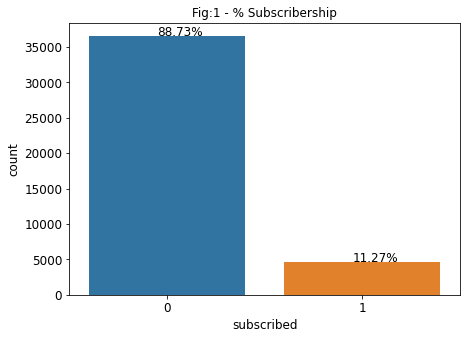

In [88]:
# defining a function to display percentage on the plot
def without_hue(plot, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.2f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()

plt.figure(figsize=(7,5))
plt.title("Fig:1 - % Subscribership")
ax=sns.countplot(x='subscribed',data=df_data_new)
plt.xticks(size=12)
plt.xlabel('subscribed',size=12)
plt.yticks(size=12)
plt.ylabel('count',size=12)
without_hue(ax,df_data_new.subscribed)


This data set is an imbalanced <a name="imbalanced"></a> data set which has 88.73% of class varaible 0 and 11.27% of 1.  
Please note:
- 0 indicates the term deposit is not subscribed 
- 1 means the term deposit is subscribed.

### Understanding Correlation <a name="corelated"></a>

In [89]:
corrMatrix = df_data_new.corr()
corrMatrix.style.background_gradient(cmap='coolwarm')

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725,0.030399
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703,0.405274
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095,-0.066357
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605,-0.324914
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333,0.230181
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970,-0.298334
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034,-0.136211
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513,0.054878
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154,-0.307771
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000,-0.354678


* **Observations**
1. None of the features have a very high correlation with whether a consumer opened a deposit account or not  
    1.1 Duration has the highest correlation with y of all the features (0.4)  
2. The social and economic features have a high correlation with one another. However, these are over different time intervals (daily, monthly, quarterly). These will have to be converted to a **common scale** <a name="scaled"></a> later on before feeding into model(s).  
    2.1 euribor3m (Euro Inter Bank Offered Rate), emp.var.rate (employement variation rate), and nr.employed (number of employees) all have a high, positive correlation with one another  
    2.2 cons.price.idx (consumer price index) has a high, positive correlation with emp.var.rate

### Effect of Age on Subscription

In [90]:
df_age_sub = df_data_new[df_data_new['subscribed']==1].age.value_counts()
df_age_notsub = df_data_new[df_data_new['subscribed']==0].age.value_counts()

df_age_sub = df_age_sub.to_frame().reset_index()
df_age_sub.columns = ['age', 'cnt_subscribed']

df_age_notsub = df_age_notsub.to_frame().reset_index()
df_age_notsub.columns = ['age', 'cnt_notsubscribed']

df_age_range = pd.merge(df_age_sub, df_age_notsub, how='outer', on='age')
df_age_range['ratio'] = df_age_range['cnt_subscribed']/df_age_range['cnt_notsubscribed']
# df_age_range.sort_values('ratio', ascending=False)

<AxesSubplot:title={'center':'Effect of Age on subscribership'}, xlabel='age'>

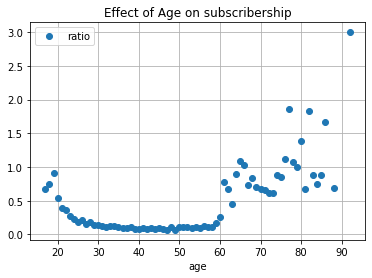

In [91]:
df_age_range.plot(x='age', y='ratio', style='o', grid=True, title = 'Effect of Age on subscribership')

<AxesSubplot:ylabel='Density'>

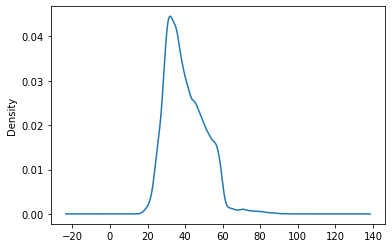

In [92]:
df1_data.age.plot(kind='kde')

* **Observations**
    1. Before the age of 20 and after the age of 60, there is a 50% + probablity of potential clients subscribing for term deposit
    2. But again - the large density of data is in the range from 20-60 years so the above observation is on a small set of data and hence not very conclusive.

### Label Encoding 
#### Understanding relation between Job Types and Subscribership

In [93]:
labelencoder = LabelEncoder()
df_data['Job_Types_Cat'] = labelencoder.fit_transform(df_data['job'])

{'admin.': 0, 'blue-collar': 1, 'entrepreneur': 2, 'housemaid': 3, 'management': 4, 'retired': 5, 'self-employed': 6, 'services': 7, 'student': 8, 'technician': 9, 'unemployed': 10, 'unknown': 11}


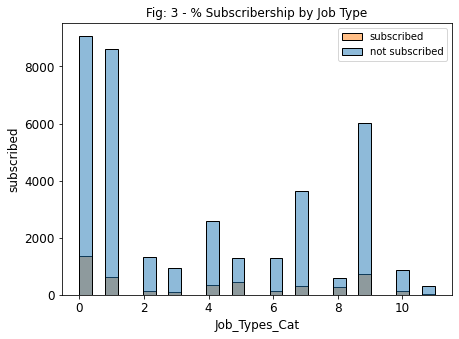

In [94]:
plt.figure(figsize=(7,5))
plt.xticks(size=12)
plt.xlabel('Job_Types_Cat',size=12)
plt.yticks(size=12)
plt.ylabel('subscribed',size=12)
ax = sns.histplot(data=df_data_new, x=df_data['Job_Types_Cat'], hue = 'subscribed')
ax.legend(labels=['subscribed','not subscribed'])
_ = ax.set_title('Fig: 3 - % Subscribership by Job Type')

le_name_mapping = dict(zip(labelencoder.classes_, labelencoder.transform(labelencoder.classes_)))
print(le_name_mapping)

* **Observations**
    1. Students and retired people seem to be more likely to subscribe to term deposit compared to other job workers

### Effect of Loan

In [95]:
df1_data['has_loan'] = np.where((df1_data['housing']=='yes') | (df1_data['loan']=='yes'), 1, 0).copy()
df1_data['has_default'] = np.where(df1_data['default'] == 'yes', 1, 0).copy()


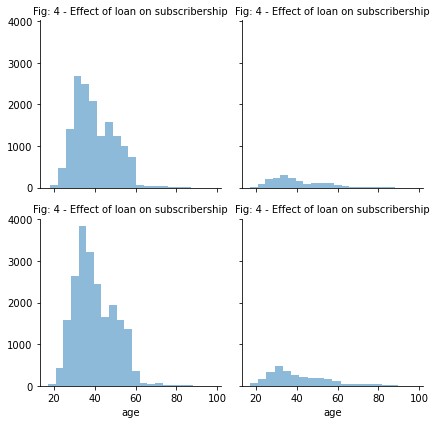

In [96]:
grid = sns.FacetGrid(df1_data, col='subscribed', row='has_loan')
grid.map(plt.hist, 'age', alpha=0.5, bins=20)
grid.set_titles('Fig: 4 - Effect of loan on subscribership')
grid.add_legend()

* **Observations**
    1. Surprisingly, people having having a loan (housing or personal) are marginally more likely to subscribe to term deposit

### Categorical Data Analysis

In [97]:
df_data_categorical = df_data_new[['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome','subscribed']]      

In [98]:
pd.crosstab(df_data_categorical.subscribed,df_data_categorical.job).apply(lambda r: r/r.sum())

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed
subscribed,,,,,,,,,,,
0,0.870274,0.931057,0.914835,0.9,0.887825,0.747674,0.895144,0.918619,0.685714,0.89174,0.857988
1,0.129726,0.068943,0.085165,0.1,0.112175,0.252326,0.104856,0.081381,0.314286,0.10826,0.142012


* **Observations**
As previously observed in Fig: 3, certain employment types seem to have a slightly higher success rate (retired and student) than others. Unemployed doesn't seem to have a higher impact on "no"'s than some of the other job types. 

In [99]:
pd.crosstab(df_data_categorical.subscribed,df_data_categorical.education).apply(lambda r: r/r.sum())

education,basic.4y,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree
subscribed,,,,,,,
0,0.89751,0.917976,0.921754,0.891645,0.777778,0.886515,0.862755
1,0.10249,0.082024,0.078246,0.108355,0.222222,0.113485,0.137245


* **Observation**
Education level doesn't seem to have a significant impact on yes vs. no's. 

Text(0.5, 1.0, 'Fig: 5 - Effect of Previous Campaign')

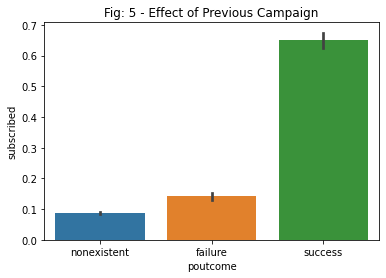

In [100]:
sns.barplot(x='poutcome', y='subscribed', data=df_data_categorical).set_title('Fig: 5 - Effect of Previous Campaign')

* **Observation**
The outcome of previous marketing campaigns contribute significantly towards a client subscribing; a previously subscribed client is likely to subscribe again.

Text(0.5, 1.0, 'Fig: 6 - Subscribership by month')

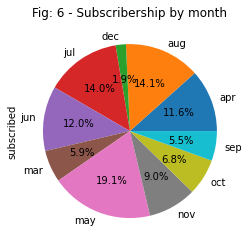

In [101]:
data = df_data_new.groupby("month")["subscribed"].sum()
data.plot.pie(autopct="%.1f%%").set_title('Fig: 6 - Subscribership by month')

* **Observation**
The months of May-Jun-Aug have more clients subscribing compared to other months

Since the class distribution is not uniform among the classes in the imbalanced dataset, the model will be biased towards the majority class. There is a way to solve the class imbalanced problem.
- Resampling - is used to adjust the class distribution of a data set 
    * Undersampling - Undersampling resamples the majority class points in the data to make them equal to the minority class points.
    * Oversampling - Oversampling refers to the resampling of the minority class points to equal the total number of majority points. 


## Resampling

In [102]:
# class count
class_count_0, class_count_1 = df1_data['subscribed'].value_counts()

# Separate class
class_0 = df1_data[df1_data['subscribed'] == 0]
class_1 = df1_data[df1_data['subscribed'] == 1]

print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (36548, 23)
class 1: (4640, 23)


### Random Under-Sampling

total class of 1 and0: 1    4640
0    4640
Name: subscribed, dtype: int64


<AxesSubplot:title={'center':'count (target)'}>

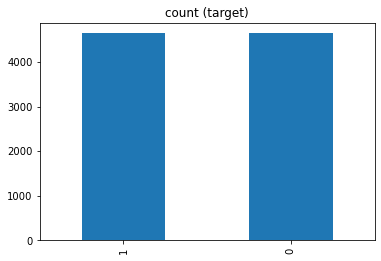

In [103]:
class_0_under = class_0.sample(class_count_1)

test_under = pd.concat([class_0_under, class_1], axis=0)

print("total class of 1 and0:",test_under['subscribed'].value_counts())

# plot the count after under-sampeling
test_under['subscribed'].value_counts().plot(kind='bar', title='count (target)')


Disadvantage of undersampling:Since we don't use the significant number of data points,we are losing information, and as a result, we will not get significant results.

### Random Over-Sampling

total class of 1 and 0: 1    36548
0    36548
Name: subscribed, dtype: int64


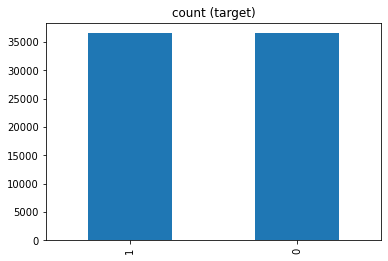

In [104]:
class_1_over = class_1.sample(class_count_0, replace=True)

test_over = pd.concat([class_1_over, class_0], axis=0)

print("total class of 1 and 0:",test_over['subscribed'].value_counts())

# plot the count after under-sampeling
test_over['subscribed'].value_counts().plot(kind='bar', title='count (target)')
df1_data= test_over.copy()

Moving ahead with **random over-sampling** because undersampling can cause overfitting and poor generalization and we don't have a lot of data so there's a good chance that valuable information is being removed.

#### Missing Value % after Over-Sampling 

In [105]:
total = test_over.isnull().sum().sort_values(ascending=False)
percent_1 = test_over.isnull().sum()/test_over.isnull().count()*100
percent_2 = percent_1.sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis = 1, keys = ['Total', '%'])
print(total.head(6))
print(missing_data.head(6))

default      11613
education     3406
housing       1746
loan          1746
job            620
marital        183
dtype: int64
           Total          %
default    11613  15.887326
education   3406   4.659626
housing     1746   2.388640
loan        1746   2.388640
job          620   0.848200
marital      183   0.250356


The missing value in the dataset is below 16% after oversampling the imbalanced dataset.

## Chi-Squared Test
A Chi-Square test is a test of statistical significance for categorical variables. It helps to understand the relationship between the categorial variables of the dataset. This helps us analyze the dependence of one category of the variable on the other independent category of the variable. Chi-squared test is performed between categorical variable and class variable. <br>

* The null hypothesis -The grouping variables have no association or correlation amongst them.
* The alternate Hypothesis-The variables are associated with each other and happen to have a correlation between the variables.


In [106]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [107]:
test_over.subscribed.value_counts()

1    36548
0    36548
Name: subscribed, dtype: int64

In [108]:
test_over.fillna('unknown', inplace=True)

In [109]:
dfcategorical = test_over[['subscribed','job','marital','education','housing','loan']].copy()

### Chi Square for subscribed and Unknown Values of Job

In [110]:
dfcategorical['job'] = np.where(test_over['job']=='unknown', 'unknown', 'known')

In [111]:
dfcategorical.job.value_counts()

known      72476
unknown      620
Name: job, dtype: int64

In [112]:
#H0 is that the attributes are completely independent
# defining the table
data = pd.crosstab(dfcategorical.subscribed,dfcategorical.job)
print(data)
stat, p, dof, expected = chi2_contingency(data)
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

job         known  unknown
subscribed                
0           36255      293
1           36221      327
p value is 0.18319936005691326
Independent (H0 holds true)


* P-value is greater than alpha (0.05). The known/unknown status of the job attribute is related to the outcome (subscribed), so discarding the rows with the null values should have a large impact on the model

### Chi-Square for subscribed and Unknown Values of Marital

In [113]:
dfcategorical['marital'] = np.where(test_over['marital']=='unknown', 'unknown', 'known')

In [114]:
test_over.marital.value_counts()

married     42242
single      22703
divorced     7968
unknown       183
Name: marital, dtype: int64

In [115]:
dfcategorical.marital.value_counts()

known      72913
unknown      183
Name: marital, dtype: int64

In [116]:
#H0 is that the attributes are completely independent
# defining the table
data = pd.crosstab(dfcategorical.subscribed,dfcategorical.marital)
print(data)
stat, p, dof, expected = chi2_contingency(data)
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

marital     known  unknown
subscribed                
0           36480       68
1           36433      115
p value is 0.0006624103950122433
Dependent (reject H0)


* P-value is less than alpha (0.05). The unknown status of the marital status attribute is related to the outcome (subscribed), so the rows with the null values should **not** be deleted

### Chi-Square for subscribed and Unknown Values of Education

In [117]:
dfcategorical['education'] = np.where(test_over['education']=='unknown', 'unknown', 'known')

In [118]:
#H0 is that the attributes are completely independent
# defining the table
data = pd.crosstab(dfcategorical.subscribed,dfcategorical.education)
print(data)
stat, p, dof, expected = chi2_contingency(data)
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

education   known  unknown
subscribed                
0           35068     1480
1           34622     1926
p value is 5.7611933724107915e-15
Dependent (reject H0)


* P-value is less than alpha (0.05). The unknown status of the education attribute is related to the outcome (subscribed) so the rows with the null values should  be deleted

### Chi-Square for subscribed and Unknown Values of Default

In [119]:
dfcategorical['default'] = np.where(test_over['default']=='unknown', 'unknown', 'known')

In [120]:
#H0 is that the attributes are completely independent
# defining the table
data = pd.crosstab(dfcategorical.subscribed,dfcategorical.default)
print(data)
stat, p, dof, expected = chi2_contingency(data)
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

default     known  unknown
subscribed                
0           28394     8154
1           33089     3459
p value is 0.0
Dependent (reject H0)


* P-value is less than alpha (0.05). The unknown status of the default attribute is related to the outcome (subscribed) so the rows with the null values should **not** be deleted

### Chi-Square for subscribed and Unknown Values of Housing

In [121]:
dfcategorical['housing'] = np.where(test_over['housing']=='unknown', 'unknown', 'known')

In [122]:
#H0 is that the attributes are completely independent
# defining the table
data = pd.crosstab(dfcategorical.subscribed,dfcategorical.housing)
print(data)
stat, p, dof, expected = chi2_contingency(data)
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

housing     known  unknown
subscribed                
0           35665      883
1           35685      863
p value is 0.6453462919527029
Independent (H0 holds true)


* P-value is greater than alpha (0.05). The unknown status of the housing attribute is related to the outcome (subscribed) so the rows with the null values should **not** be deleted

### Chi- Square for subscribed and Unknown Values of Loan

In [123]:
dfcategorical['loan'] = np.where(test_over['loan']=='unknown', 'unknown', 'known')

In [124]:
#H0 is that the attributes are completely independent
# defining the table
data = pd.crosstab(dfcategorical.subscribed,dfcategorical.loan)
print(data)
stat, p, dof, expected = chi2_contingency(data)
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

loan        known  unknown
subscribed                
0           35665      883
1           35685      863
p value is 0.6453462919527029
Independent (H0 holds true)


* P-value is greater than alpha (0.05). The unknown status of the housing attribute is related to the outcome (subscribed) so the rows with the null values should **not** be deleted

## Feature Retention

### Variables to be removed
* **Housing and Loan** - When the Chi-Square test was performed to compare each of these variables to the outcome (y), it was determined that both variables are independent of y. Removing them will not have a large impact on the accuracy of the model (see below for Chi-sqaure results).
* **Duration** - Duration of the call can not be used in the model for prediction outcomes, because the duration of the call will not be known until after the call is complete
* **pdays** - The value "999" was used in the pdays columns for all scenarios wher a customer was not previously contacted, which will impact the model. Other features such as "Campaign" and "Previous" indicate if a customer was previously contacted, so pdays is not necessary

### New Variables Created
* **Has Loan** - Housing and loan will be removed, and a new variable will be created to combine them. The new variable will be "Has Loan" which will have a value of 1 if  the customer has either a Housing loan or Personal loan, and a value of 0 if the customer has no loans
* **Education** Compression - The education levels of basic.4y, basic.6y and basic.9y have been converged into one-single category called basic

### Handling Null Variables
* The null variables will "job", "marital", "default", and "education" will be handled by keeping an "unknown" category for each of the variables.  After performing the chi-square there appears to be a relationship between the unknown values and the outcome (y), so the rows with null values for those attributes should not be deleted. The "unknown" category for "Has Loan" will be kept as well.

In [125]:
df1_data.isnull().sum()

df1_data= df1_data.drop(['housing','loan','contact', 'month','day_of_week','duration','pdays','has_default'],axis=1)


In [126]:
# grouping different basic education into single group
df1_data.education.fillna('unknown', inplace=True)
df1_data['education'] = np.where((df1_data["education"].str.startswith('basic')),'basic',df1_data['education'])

df1_data['education'] = df1_data['education'].replace('unknown',np.nan)


### Train - Test Split:
* Stratifying the data and allocating 80-20% for Train-Test, respectively.

In [127]:
from sklearn.model_selection import train_test_split
X = df1_data.drop(['subscribed'], axis=1)
y = df1_data['subscribed']

X.info()

#X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=df_data_na['subscribed'], test_size=0.2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73096 entries, 30146 to 41187
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             73096 non-null  int64  
 1   job             72476 non-null  object 
 2   marital         72913 non-null  object 
 3   education       69690 non-null  object 
 4   default         61483 non-null  object 
 5   campaign        73096 non-null  int64  
 6   previous        73096 non-null  int64  
 7   poutcome        73096 non-null  object 
 8   emp.var.rate    73096 non-null  float64
 9   cons.price.idx  73096 non-null  float64
 10  cons.conf.idx   73096 non-null  float64
 11  euribor3m       73096 non-null  float64
 12  nr.employed     73096 non-null  float64
 13  has_loan        73096 non-null  int32  
dtypes: float64(5), int32(1), int64(3), object(5)
memory usage: 8.1+ MB


## Pipeline

In [128]:
df1_data.columns
df1_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73096 entries, 30146 to 41187
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             73096 non-null  int64  
 1   job             72476 non-null  object 
 2   marital         72913 non-null  object 
 3   education       69690 non-null  object 
 4   default         61483 non-null  object 
 5   campaign        73096 non-null  int64  
 6   previous        73096 non-null  int64  
 7   poutcome        73096 non-null  object 
 8   emp.var.rate    73096 non-null  float64
 9   cons.price.idx  73096 non-null  float64
 10  cons.conf.idx   73096 non-null  float64
 11  euribor3m       73096 non-null  float64
 12  nr.employed     73096 non-null  float64
 13  subscribed      73096 non-null  int32  
 14  has_loan        73096 non-null  int32  
dtypes: float64(5), int32(2), int64(3), object(5)
memory usage: 8.4+ MB


In [129]:
num_features = ['age', 'campaign', 'previous','emp.var.rate', 'cons.price.idx', 
                        'cons.conf.idx', 'euribor3m', 'nr.employed', 'has_loan']
cat_features = ['job', 'marital', 'education','poutcome','default']

In [130]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

num_pipeline = Pipeline(
    steps=[
       # ('num_imputer', SimpleImputer()),  # we will tune differet strategies later
        ('scaler', StandardScaler()),
        ]
)


cat_pipeline = Pipeline(
    steps=[
        ('cat_imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder()),
    ]
)

# Assign features to the pipelines and Combine two pipelines to form the preprocessor
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num_pipeline', num_pipeline, num_features),
        ('cat_pipeline', cat_pipeline, cat_features),
    ]
)

## Decision Tree Model - Training, Testing & Evaluation
DecisionTree Classifier is used in the pipeline to train the model
Three different parameters are used: 
* criterion to measure quality of the split (gini and entropy for the information gain)
* max depth - the maxinum depth of the tree (3,4,5,6,7)
* min sample split - the minimum number of samples required to split an internal node(10,20)

In [131]:
# Specify the model to use, which is DecisionTreeClassifier
# Make a full pipeline by combining preprocessor and the model
from sklearn.tree import DecisionTreeClassifier

pipeline_dt = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('clf_dt', DecisionTreeClassifier(random_state=42)),
    ]
)

In [132]:
# we show how to use GridSearch with K-fold cross validation (K=10) to fine tune the model
# we use the accuracy as the scoring metric with training score return_train_score=True
from sklearn.model_selection import GridSearchCV


param_grid_dt = [
    {
        'clf_dt__criterion': ['gini', 'entropy'], 
        'clf_dt__max_depth': [12, 20, 30,35],
        'clf_dt__min_samples_split': [10, 20, 30, 40],
            
            
    }
]

# set up the grid search 
grid_search_dt = GridSearchCV(pipeline_dt, param_grid_dt, cv=10, scoring='accuracy')

In [133]:
%%time
grid_search_dt.fit(X_train, y_train)

Wall time: 12min 38s


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num_pipeline',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['age',
                                                                          'campaign',
                                                                          'previous',
                                                                          'emp.var.rate',
                                                                          'cons.price.idx',
                                                                          'cons.conf.idx',
                                                                          'euribor3m',
           

In [134]:
# check the best performing parameter combination
grid_search_dt.best_params_

{'clf_dt__criterion': 'entropy',
 'clf_dt__max_depth': 35,
 'clf_dt__min_samples_split': 10}

In [135]:
# build-in CV results keys
sorted(grid_search_dt.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_clf_dt__criterion',
 'param_clf_dt__max_depth',
 'param_clf_dt__min_samples_split',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'split5_test_score',
 'split6_test_score',
 'split7_test_score',
 'split8_test_score',
 'split9_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [136]:
# test score for the 20 decision tree models
grid_search_dt.cv_results_['mean_test_score']

array([0.77337694, 0.77089727, 0.76836633, 0.76627998, 0.84159294,
       0.82043903, 0.80670694, 0.79713023, 0.89585447, 0.85778772,
       0.83518009, 0.81913925, 0.90112166, 0.86090007, 0.83685602,
       0.82028505, 0.77024749, 0.76790461, 0.76628001, 0.76434754,
       0.82664673, 0.81093097, 0.80099524, 0.79235915, 0.89041636,
       0.8572234 , 0.83642847, 0.8203706 , 0.90248983, 0.86433752,
       0.8416101 , 0.82394473])

In [137]:
# best decistion tree model test score
grid_search_dt.best_score_

0.9024898301583214

In [163]:
clf_best_dt = grid_search_dt.best_estimator_
clf_best_dt

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_pipeline',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'campaign',
                                                   'previous', 'emp.var.rate',
                                                   'cons.price.idx',
                                                   'cons.conf.idx', 'euribor3m',
                                                   'nr.employed', 'has_loan']),
                                                 ('cat_pipeline',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                       

In [165]:
y_pred = clf_best_dt.predict(X_test)

# calculate accuracy, precision, recall, f1-score for Decision Tree

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

print(f'Accuracy Score DT : {accuracy_score(y_test, y_pred)}')
print(f'Precision Score DT: {precision_score(y_test, y_pred)}')
print(f'Recall Score DT : {recall_score(y_test, y_pred)}')
print(f'F1 Score DT : {f1_score(y_test, y_pred)}')

Accuracy Score DT : 0.9116963064295486
Precision Score DT: 0.8726194980451507
Recall Score DT : 0.9609722222222222
F1 Score DT : 0.9146671954524422


### Xgboost - Extreme Gradient Boosting 
XGBoost is an implementation of gradient boosted decision trees designed for speed and performance. Gradient Boosting is an approach where new models are created that predict the residuals or errors of prior models and then added together to make the final prediction. It is called gradient boosting because it uses a gradient descent algorithm to minimize the loss when adding new models.

XGBClassifier is used to train the model with different parameters:

* max_depth- Maximum tree depth for base learners
* n_estimators parameters- Number of boosting rounds
* objective as binary logistic- Specify the learning task and the corresponding learning objective
* learning_rate- Boosting learning rate and different learning rates are used to tuning the model



In [155]:
import xgboost
from xgboost import XGBClassifier
# xg pipeline
pipeline_xg = Pipeline([
     ('preprocessor', preprocessor),
     ('clf_xg', XGBClassifier(objective="binary:logistic",verbosity = 0,use_label_encoder=False, random_state=42)),
 ])


param_grid_xg = [
     {
         'clf_xg__max_depth': [5],  
         'clf_xg__n_estimators': [100],
         'clf_xg__learning_rate': [0.1],
     }
 ]

# # set up the grid search 
grid_search_xg = GridSearchCV(pipeline_xg, param_grid_xg, cv=10, scoring='accuracy')

In [156]:
 %%time
 #train the model using the full pipeline
grid_search_xg.fit(X_train, y_train)

Wall time: 1min 23s


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num_pipeline',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['age',
                                                                          'campaign',
                                                                          'previous',
                                                                          'emp.var.rate',
                                                                          'cons.price.idx',
                                                                          'cons.conf.idx',
                                                                          'euribor3m',
           

In [157]:
# # check the best performing parameter combination
grid_search_xg.best_params_

{'clf_xg__learning_rate': 0.1,
 'clf_xg__max_depth': 5,
 'clf_xg__n_estimators': 100}

In [158]:
# # build-in CV results keys
sorted(grid_search_xg.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_clf_xg__learning_rate',
 'param_clf_xg__max_depth',
 'param_clf_xg__n_estimators',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'split5_test_score',
 'split6_test_score',
 'split7_test_score',
 'split8_test_score',
 'split9_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [159]:
# # test score for the 20 decision tree models
grid_search_xg.cv_results_['mean_test_score']

array([0.76056819])

In [160]:
# # best decistion tree model test score
grid_search_xg.best_score_

0.7605681892359125

In [161]:
clf_best_xg = grid_search_xg.best_estimator_
clf_best_xg

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_pipeline',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'campaign',
                                                   'previous', 'emp.var.rate',
                                                   'cons.price.idx',
                                                   'cons.conf.idx', 'euribor3m',
                                                   'nr.employed', 'has_loan']),
                                                 ('cat_pipeline',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                       

In [166]:
y_pred = clf_best_xg.predict(X_test)

# calculate accuracy, precision, recall, f1-score for XGBoost

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

print(f'Accuracy Score XG: {accuracy_score(y_test, y_pred)}')
print(f'Precision Score XG : {precision_score(y_test, y_pred)}')
print(f'Recall Score XG : {recall_score(y_test, y_pred)}')
print(f'F1 Score XG: {f1_score(y_test, y_pred)}')

Accuracy Score XG: 0.7613543091655267
Precision Score XG : 0.8236525379382522
Recall Score XG : 0.6558333333333334
F1 Score XG: 0.7302250057991186


### Logistic Regression chaining with Principal Component Analysis(PCA)
The PCA does an unsupervised dimensionality reduction, while the logistic regression does the prediction.<br>
The PCA converts data from high dimensional space to low dimensional space by selecting the most important attributes that capture maximum information about the dataset and logistic regression method is used to train the model.
* The parameter of PCA:  
  * n_components is number of components to keep and set to 10, 20 and 30
* The paramters of logistic regression : 
  * solver is algorithm to use in the optimization problem and ‘lbfgs’ which handle multinomial loss is used.
  * max_iter is maximum number of iterations taken for the solvers to converge and 1000 is used
  * C is inverse of regularization strength. The higher values of C correspond to less regularization.


In [138]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
# logistic regression pipeline
C = np.logspace(-4, 4, 50)
n_components = list(range(1,X_train.shape[1]+1,1))


pipeline_log_reg = Pipeline([
    ('preprocessor', preprocessor),
    ('pca',PCA()),
    ('log_reg', LogisticRegression(solver = 'lbfgs', max_iter=1000,random_state=42)),
 
    
])

param_grid_log_reg = [
    {
        'pca__n_components': [10,20,30],
        'log_reg__C': [0.001,0.01,0.1,1,10,100,1000], 
          
    }
]

# set up the grid search 
grid_search_log_reg = GridSearchCV(pipeline_log_reg,param_grid_log_reg, cv=10, scoring='accuracy')


In [139]:
%%time
grid_search_log_reg.fit(X_train, y_train)

Wall time: 9min 50s


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num_pipeline',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['age',
                                                                          'campaign',
                                                                          'previous',
                                                                          'emp.var.rate',
                                                                          'cons.price.idx',
                                                                          'cons.conf.idx',
                                                                          'euribor3m',
           

In [140]:
# check  the best performing parameter combination
grid_search_log_reg.best_params_

{'log_reg__C': 0.1, 'pca__n_components': 30}

In [141]:
# build-in CV results keys
sorted(grid_search_log_reg.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_log_reg__C',
 'param_pca__n_components',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'split5_test_score',
 'split6_test_score',
 'split7_test_score',
 'split8_test_score',
 'split9_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [142]:
# test score for the 20 decision tree models
grid_search_log_reg.cv_results_['mean_test_score']

array([0.71542161, 0.7166529 , 0.71689231, 0.71574653, 0.72470743,
       0.72552827, 0.71566102, 0.72409181, 0.72669116, 0.71566102,
       0.72421152, 0.72663984, 0.71566102, 0.72429703, 0.72658854,
       0.71566102, 0.72427993, 0.72658854, 0.71566102, 0.72427993,
       0.72660564])

In [143]:
# best decistion tree model test score
grid_search_log_reg.best_score_

0.7266911551213491

In [167]:
clf_best_log_reg = grid_search_log_reg.best_estimator_
clf_best_log_reg

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_pipeline',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'campaign',
                                                   'previous', 'emp.var.rate',
                                                   'cons.price.idx',
                                                   'cons.conf.idx', 'euribor3m',
                                                   'nr.employed', 'has_loan']),
                                                 ('cat_pipeline',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                       

In [168]:
y_pred = clf_best_log_reg.predict(X_test)

# calculate accuracy, precision, recall, f1-score for logistic regression

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

print(f'Accuracy Score lg: {accuracy_score(y_test, y_pred)}')
print(f'Precision Score lg: {precision_score(y_test, y_pred)}')
print(f'Recall Score lg: {recall_score(y_test, y_pred)}')
print(f'F1 Score lg: {f1_score(y_test, y_pred)}')

Accuracy Score lg: 0.7305745554035568
Precision Score lg: 0.7480602464628023
Recall Score lg: 0.6829166666666666
F1 Score lg: 0.7140056632541929


### Random Forest

A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. <br>
<br>
Parameters used:
* Ctiterion - gini and entropy are used to measure the quality of split
* n_estimators - the number of trees in a forest
* max_depth- the maximum depth of a tree
* min_samples_split - the minimum number of samples required to split an internal node


In [189]:
# random forest classifer
from sklearn.ensemble import RandomForestClassifier

# rf pipeline
pipeline_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('clf_rf', RandomForestClassifier(random_state=42)),
])

# here we are trying 2x3 different rf models
param_grid_rf = [
    {
        'clf_rf__criterion': ['entropy'], 
        'clf_rf__n_estimators': [150],
        'clf_rf__min_samples_split': [10],
        'clf_rf__max_depth': [35],
       
    }
]

# set up the grid search 
grid_search_rf = GridSearchCV(pipeline_rf, param_grid_rf, cv=10, scoring='accuracy')

In [190]:
%%time
# train the model using the full pipeline
grid_search_rf.fit(X_train, y_train)

Wall time: 2min 33s


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num_pipeline',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['age',
                                                                          'campaign',
                                                                          'previous',
                                                                          'emp.var.rate',
                                                                          'euribor3m',
                                                                          'nr.employed',
                                                                          'has_loan']),
                 

In [191]:
grid_search_rf.best_params_

{'clf_rf__criterion': 'entropy',
 'clf_rf__max_depth': 35,
 'clf_rf__min_samples_split': 10,
 'clf_rf__n_estimators': 150}

In [192]:
# best test score
print('best dt score is: ', grid_search_dt.best_score_)
print('best rf score is: ', grid_search_rf.best_score_)
print('best xg score is: ', grid_search_xg.best_score_)
print('best log_reg score is: ', grid_search_log_reg.best_score_)

best dt score is:  0.9024898301583214
best rf score is:  0.9218653116860235
best xg score is:  0.7605681892359125
best log_reg score is:  0.7266911551213491


In [193]:
# select the best model
# the best parameters are shown, note SimpleImputer() implies that mean strategry is used
clf_best = grid_search_rf.best_estimator_
clf_best

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_pipeline',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'campaign',
                                                   'previous', 'emp.var.rate',
                                                   'euribor3m', 'nr.employed',
                                                   'has_loan']),
                                                 ('cat_pipeline',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder())]),
                      

In [194]:
clf_best = grid_search_rf.best_estimator_
clf_best

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_pipeline',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'campaign',
                                                   'previous', 'emp.var.rate',
                                                   'euribor3m', 'nr.employed',
                                                   'has_loan']),
                                                 ('cat_pipeline',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder())]),
                      

In [195]:
# final test on the testing set
# To predict on new data: simply calling the predict method 
# the full pipeline steps will be applied to the testing set followed by the prediction
y_pred = clf_best.predict(X_test)

# calculate accuracy, precision, recall, f1-score
# Note: y_test is the ground truth for the tesing set
# we have similiar score for the testing set as the cross validation score - good
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

print(f'Accuracy Score rf: {accuracy_score(y_test, y_pred)}')
print(f'Precision Score rf: {precision_score(y_test, y_pred)}')
print(f'Recall Score rf: {recall_score(y_test, y_pred)}')
print(f'F1 Score rf: {f1_score(y_test, y_pred)}')

Accuracy Score rf: 0.9311901504787962
Precision Score rf: 0.8992008249548853
Recall Score rf: 0.9688888888888889
F1 Score rf: 0.9327450193876187


### Feature Importance

In [172]:
clf_best.named_steps

{'preprocessor': ColumnTransformer(transformers=[('num_pipeline',
                                  Pipeline(steps=[('scaler', StandardScaler())]),
                                  ['age', 'campaign', 'previous', 'emp.var.rate',
                                   'cons.price.idx', 'cons.conf.idx',
                                   'euribor3m', 'nr.employed', 'has_loan']),
                                 ('cat_pipeline',
                                  Pipeline(steps=[('cat_imputer',
                                                   SimpleImputer(strategy='most_frequent')),
                                                  ('onehot', OneHotEncoder())]),
                                  ['job', 'marital', 'education', 'poutcome',
                                   'default'])]),
 'clf_rf': RandomForestClassifier(criterion='entropy', max_depth=35, min_samples_split=10,
                        n_estimators=150)}

In [173]:
clf_best.named_steps['preprocessor']

ColumnTransformer(transformers=[('num_pipeline',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['age', 'campaign', 'previous', 'emp.var.rate',
                                  'cons.price.idx', 'cons.conf.idx',
                                  'euribor3m', 'nr.employed', 'has_loan']),
                                ('cat_pipeline',
                                 Pipeline(steps=[('cat_imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot', OneHotEncoder())]),
                                 ['job', 'marital', 'education', 'poutcome',
                                  'default'])])

In [174]:
i = clf_best['clf_rf'].feature_importances_
i

array([2.11667254e-01, 1.08300473e-01, 1.45406242e-02, 6.29835670e-02,
       3.39714274e-02, 4.59666993e-02, 2.04940715e-01, 6.35732159e-02,
       3.24377523e-02, 1.45739360e-02, 1.27638552e-02, 7.09792529e-03,
       5.14012716e-03, 9.41850890e-03, 6.77500197e-03, 6.95735103e-03,
       9.71380361e-03, 4.93611167e-03, 1.23625209e-02, 5.84415084e-03,
       1.02231704e-02, 1.35533348e-02, 1.21526132e-02, 1.32950728e-02,
       1.39632983e-02, 3.65876666e-04, 1.07161716e-02, 1.47551026e-02,
       6.88184741e-03, 7.23781420e-03, 2.28794873e-02, 5.95188340e-06,
       5.23869401e-06])

In [175]:
# get columnTransformer
clf_best[0] 

ColumnTransformer(transformers=[('num_pipeline',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['age', 'campaign', 'previous', 'emp.var.rate',
                                  'cons.price.idx', 'cons.conf.idx',
                                  'euribor3m', 'nr.employed', 'has_loan']),
                                ('cat_pipeline',
                                 Pipeline(steps=[('cat_imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot', OneHotEncoder())]),
                                 ['job', 'marital', 'education', 'poutcome',
                                  'default'])])

In [176]:
clf_best[0].transformers_

[('num_pipeline',
  Pipeline(steps=[('scaler', StandardScaler())]),
  ['age',
   'campaign',
   'previous',
   'emp.var.rate',
   'cons.price.idx',
   'cons.conf.idx',
   'euribor3m',
   'nr.employed',
   'has_loan']),
 ('cat_pipeline',
  Pipeline(steps=[('cat_imputer', SimpleImputer(strategy='most_frequent')),
                  ('onehot', OneHotEncoder())]),
  ['job', 'marital', 'education', 'poutcome', 'default'])]

In [177]:
num_original_feature_names = clf_best[0].transformers_[0][2]
num_original_feature_names

['age',
 'campaign',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'has_loan']

In [178]:
cat_original_feature_names = clf_best[0].transformers_[1][2]
cat_original_feature_names

['job', 'marital', 'education', 'poutcome', 'default']

In [179]:
cat_new_feature_names = list(clf_best[0].transformers_[1][1]['onehot'].get_feature_names(cat_original_feature_names))
cat_new_feature_names

['job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'education_basic',
 'education_high.school',
 'education_illiterate',
 'education_professional.course',
 'education_university.degree',
 'poutcome_failure',
 'poutcome_nonexistent',
 'poutcome_success',
 'default_no',
 'default_yes']

In [180]:
feature_names = num_original_feature_names + cat_new_feature_names
feature_names

['age',
 'campaign',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'has_loan',
 'job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'education_basic',
 'education_high.school',
 'education_illiterate',
 'education_professional.course',
 'education_university.degree',
 'poutcome_failure',
 'poutcome_nonexistent',
 'poutcome_success',
 'default_no',
 'default_yes']

In [181]:
r = pd.DataFrame(i, index=feature_names, columns=['importance'])
r

,importance
age,0.211667
campaign,0.108300
previous,0.014541
emp.var.rate,0.062984
cons.price.idx,0.033971
cons.conf.idx,0.045967
euribor3m,0.204941
nr.employed,0.063573
has_loan,0.032438
job_admin.,0.014574


In [182]:
r.sort_values('importance', ascending=False)

,importance
age,0.211667
euribor3m,0.204941
campaign,0.108300
nr.employed,0.063573
emp.var.rate,0.062984
cons.conf.idx,0.045967
cons.price.idx,0.033971
has_loan,0.032438
poutcome_success,0.022879
education_university.degree,0.014755


<AxesSubplot:>

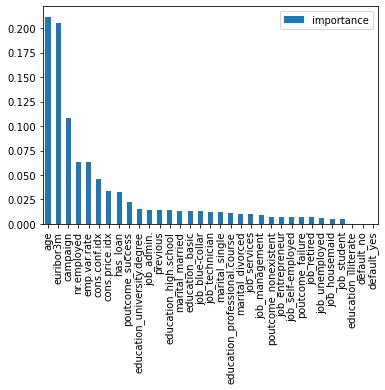

In [183]:
r.sort_values('importance', ascending=False).plot.bar()

In [197]:
num_features = ['age', 'campaign', 'previous','emp.var.rate','euribor3m','nr.employed', 'has_loan']
                         
cat_features = ['job', 'marital', 'education','poutcome','default']

In [198]:
# after removing some less importance and high correlated features 
# xg pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num_pipeline', num_pipeline, num_features),
        ('cat_pipeline', cat_pipeline, cat_features),
    ]
)
pipeline_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('clf_rf', RandomForestClassifier(random_state=42)),
])


param_grid_rf = [
    {
        'clf_rf__criterion': ['entropy'], 
        'clf_rf__n_estimators': [150],
        'clf_rf__min_samples_split': [10],
        'clf_rf__max_depth': [35],
       
    }
]


# update the grid search 
grid_search_rf_updated = GridSearchCV(pipeline_rf, param_grid_rf, cv=10, scoring='accuracy')

# train the model using the updated full pipeline
grid_search_rf_updated.fit(X_train, y_train)

print('best rf score is: ', grid_search_rf.best_score_)
print('best rf score after feature selection is: ', grid_search_rf_updated.best_score_)


best rf score is:  0.9218653116860235
best rf score after feature selection is:  0.9218653116860235


## Persist the Model
A pickle file is created to save the trained model which can be loaded in to make predictions.

In [212]:
# Save the model as a pickle file
import joblib
joblib.dump(clf_best, "clf-best.pickle")

['clf-best.pickle']

### Predictions:
Load the model from saved pickle file and predict whether 2 clients (hypothetically created), will subscribe or not for term deposit based on tele-marketing campaign.

In [213]:
# Load the model from a pickle file
saved_tree_clf = joblib.load("clf-best.pickle")
saved_tree_clf

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_pipeline',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'campaign',
                                                   'previous', 'emp.var.rate',
                                                   'euribor3m', 'nr.employed',
                                                   'has_loan']),
                                                 ('cat_pipeline',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder())]),
                      

In [216]:
customer1 = pd.DataFrame(
    {
        'age':[28],
        'job':['student'],
        'marital':['single'],
        'education':['university.degree'],
        'default':['yes'],
        'campaign':[1],
        'previous':[1],
        'poutcome':['success'],
        'emp.var.rate':[1.1],
        'cons.price.idx':[93.918],
        'cons.conf.idx':[-42.7],
        'euribor3m':[4.857],
        'nr.employed':[5191],        
        'has_loan':[1]
    
    }
)
customer1


,age,job,marital,education,default,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,has_loan
0,28,student,single,university.degree,yes,1,1,success,1.1,93.918,-42.7,4.857,5191,1


In [217]:
pred1 = saved_tree_clf.predict(customer1)
pred1

array([0])

In [218]:
customer2 = pd.DataFrame(
    {
        'age':[39],
        'job':['self-employed'],
        'marital':['divorced'],
        'education':['university.degree'],
        'default':['no'],
        'campaign':[1],
        'previous':[1],
        'poutcome':['success'],
        'emp.var.rate':[-3.4],
        'cons.price.idx':[92.379],
        'cons.conf.idx':[-29.8],
        'euribor3m':[0.755],
        'nr.employed':[5017.5],       
        'has_loan':[0]
        

    }
)
customer2

,age,job,marital,education,default,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,has_loan
0,39,self-employed,divorced,university.degree,no,1,1,success,-3.4,92.379,-29.8,0.755,5017.5,0


In [219]:
pred1 = saved_tree_clf.predict(customer2)
pred1

array([1])

**END**